# Uso de la API Gemini en Vertex AI
La API Gemini en Vertex AI ofrece una plataforma unificada para interactuar con los modelos Gemini de manera eficiente.

📌 Uso del Vertex AI SDK
En este notebook, exploraremos cómo utilizar el Vertex AI SDK para Python para realizar llamadas a la API Gemini dentro de Vertex AI. Esto permitirá la generación de contenido y el procesamiento de datos de manera escalable y optimizada.

In [17]:
!pip install matplotlib

# Desinstalar versiones anteriores
!pip uninstall -y google-cloud-aiplatform vertexai

# Instalar la versión correcta que incluye soporte para Gemini
!pip install --upgrade google-cloud-aiplatform>=1.40.0

     |████████████████████████████████| 8.0 MB 4.5 MB/s eta 0:00:01
     |████████████████████████████████| 111 kB 59.0 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 117.9 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 14.0 MB/s eta 0:00:01
     |████████████████████████████████| 253 kB 77.4 MB/s eta 0:00:01
You should consider upgrading via the '/Users/lauraorozco/Desktop/vertex_ai/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install --upgrade google-cloud-aiplatform


     |████████████████████████████████| 7.5 MB 3.6 MB/s eta 0:00:01
You should consider upgrading via the '/Users/lauraorozco/Desktop/vertex_ai/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip show google-cloud-aiplatform


Found existing installation: google-cloud-aiplatform 1.38.1
Uninstalling google-cloud-aiplatform-1.38.1:
  Successfully uninstalled google-cloud-aiplatform-1.38.1
zsh:1: 1.40.0 not found


## 📌 Inicialización de Vertex AI en Python

Este bloque de código configura el entorno para interactuar con **Vertex AI** en **Google Cloud**, asegurando la autenticación adecuada con credenciales de servicio.

### 🔹 Explicación del Código

1. **Importación de librerías necesarias**:
   - `os`: Para manejar variables de entorno.
   - `google.cloud.aiplatform`: SDK de Vertex AI para gestionar modelos y despliegues.
   - `google.oauth2.service_account`: Para autenticación con credenciales de servicio.

2. **Carga de credenciales desde una variable de entorno**:
   - Obtiene la ruta del archivo de credenciales desde `GOOGLE_APPLICATION_CREDENTIALS_VERTEX`.

3. **Verificación de credenciales**:
   - Si no se encuentra la variable de entorno, se genera un error.

4. **Carga de credenciales desde un archivo JSON**:
   - Se utiliza `service_account.Credentials.from_service_account_file()` para autenticar la cuenta de servicio.

5. **Inicialización de Vertex AI**:
   - Se obtiene el `PROJECT_ID` y la `REGION` desde variables de entorno.
   - Se llama a `aiplatform.init()` para establecer el proyecto, la región y las credenciales en el SDK.

### ✅ ¿Qué hace este código?
Este código asegura que el entorno esté correctamente configurado para interactuar con **Vertex AI**, permitiendo autenticación y gestión de modelos en Google Cloud.


In [2]:
import os
from google.cloud import aiplatform
from google.oauth2 import service_account
from vertexai.generative_models import GenerativeModel

# Cargar credenciales desde GOOGLE_APPLICATION_CREDENTIALS
cred_path = os.getenv("GOOGLE_APPLICATION_CREDENTIALS_VERTEX")

if not cred_path:
    raise ValueError("GOOGLE_APPLICATION_CREDENTIALS no está configurado.")

credentials = service_account.Credentials.from_service_account_file(cred_path)

# Inicialización de Vertex AI
PROJECT_ID = os.getenv("PROJECT_ID")
LOCATION = os.getenv("GOOGLE_CLOUD_REGION", "us-central1")

aiplatform.init(
    project=PROJECT_ID,
    location=LOCATION,
    credentials=credentials
)

# Usar el modelo
model = GenerativeModel("gemini-pro")
response = model.generate_content("que dia es hoy?")
print(response.text)


La fecha de hoy es 2023-10-26. 

¿Te gustaría saber qué día de la semana es, o alguna otra información relacionada con la fecha? 



## 📌 Generación de Contenido con Gemini en Vertex AI (Streaming)

Este bloque de código genera una respuesta utilizando el modelo **Gemini** en **Vertex AI**, con la opción de recibir la salida en **streaming** (respuesta en tiempo real).

### 🔹 Explicación del Código

1. **Llamado a la API con generación en streaming**:
   - Se invoca `model.generate_content("¿Qué día es hoy?", stream=True)`, lo que solicita una respuesta del modelo Gemini y la transmite progresivamente.

2. **Procesamiento de la respuesta en tiempo real**:
   - `for response in responses:` recorre cada fragmento de texto generado.
   - `print(response.text, end="")` imprime el texto recibido sin saltos de línea innecesarios.

### ✅ ¿Qué hace este código?
Este código permite recibir la respuesta del modelo Gemini de manera **progresiva**, lo que es útil para aplicaciones en las que se requiere mostrar texto conforme se genera, mejorando la experiencia del usuario.


In [3]:
responses = model.generate_content("que dia es hoy?", stream=True)

for response in responses:
    print(response.text, end="")

¡Hola! Hoy es 2023-04-19, miércoles. ¿En qué puedo ayudarte hoy?

In [4]:
prompt = """Cuales son los mayores desafios de la mujer en la industra de la tecnologia."""  # try your own prompt

response = model.generate_content(prompt)

print(response.text)

## Los Desafíos que Enfrentan las Mujeres en la Industria Tecnológica

Las mujeres enfrentan una serie de desafíos específicos en la industria tecnológica, incluyendo:

**1. Desigualdad de Género:**

* **Brecha Salarial:** Las mujeres en tecnología ganan **un promedio de 20% menos** que sus colegas masculinos.
* **Representación Subrepresentada:** Las mujeres **representan solo el 25% de la fuerza laboral tecnológica**, a pesar de constituir el 50% de la población mundial.
* **Falta de Diversidad:** La falta de diversidad en la industria tecnológica crea una cultura donde las mujeres **no siempre se sienten bienvenidas o incluidas**.

**2. Discriminación y Acoso:**

* **Acoso Sexual:** Se estima que **el 70% de las mujeres en tecnología han experimentado algún tipo de acoso sexual**.
* **Discriminación en la Contratación y Ascensos:** Existe una **perspectiva inconsciente** que las mujeres son menos competentes que los hombres en la tecnología.
* **Microagresiones:** Las mujeres en tec

In [5]:
from vertexai.generative_models import (
    GenerationConfig,
    GenerativeModel,
    HarmBlockThreshold,
    HarmCategory,
    Image,
    Part,
    SafetySetting,
)

## 🔧 Configuración de Parámetros de Generación en Gemini

Este bloque de código define la configuración de generación de texto para el modelo **Gemini** en **Vertex AI**, estableciendo parámetros clave para controlar la creatividad y el tamaño de la respuesta.

### 📌 Explicación del Código

1. **Definición de la Configuración de Generación**  
   Se crea una instancia de `GenerationConfig` con los siguientes parámetros:
   - `temperature=0.9`: Controla la aleatoriedad en la respuesta (valores más altos generan respuestas más creativas).
   - `top_p=1.0`: Técnica de muestreo para controlar la diversidad en la generación de texto.
   - `top_k=32`: Limita la selección de palabras a las 32 más probables en cada paso.
   - `candidate_count=1`: Número de respuestas generadas por la API (en este caso, solo una).
   - `max_output_tokens=8192`: Número máximo de tokens que puede contener la respuesta.

2. **Generación de Respuesta con Gemini**  
   Se invoca `model.generate_content()` pasando la configuración definida y la consulta `"¿Qué día es hoy?"`, lo que solicita al modelo generar una respuesta basada en los parámetros establecidos.

3. **Impresión del Resultado**  
   `print(response.text)` muestra en pantalla la respuesta generada por el modelo.

### ✅ ¿Por qué es útil este código?
Permite personalizar la generación de texto según las necesidades de la aplicación, ajustando creatividad, precisión y tamaño de la respuesta.



In [6]:
generation_config = GenerationConfig(
    temperature=0.9,
    top_p=1.0,
    top_k=32,
    candidate_count=1,
    max_output_tokens=8192,
)

response = model.generate_content(
    "que dia es hoy?",
    generation_config=generation_config,
)

print(response.text)

Lo siento, no puedo acceder a información en tiempo real, como la fecha actual. Mi conocimiento está limitado a la información que estaba disponible hasta noviembre de 2023.


## ¿Qué significa "Safety ratings"?
La API de Gemini incluye un sistema de evaluación de seguridad que clasifica el contenido generado en varias categorías de riesgo. Cada categoría tiene una probabilidad y una severidad asociada.

### ¿Cuándo debería preocuparme por estos valores?
Si "probability" o "severity" superan 0.5 (50%), puede indicar un problema en la respuesta generada.

Si una categoría cambia de NEGLIGIBLE a LOW, MEDIUM o HIGH, podría significar que el modelo está generando contenido inapropiado.

Cada una de estas categorías tiene dos métricas:

Probability (Probabilidad): Qué tan probable es que la respuesta contenga este tipo de contenido.

Severity (Severidad): Qué tan grave sería el impacto si la respuesta contiene este contenido.

**Nota:** Gemini 2.0 Flash emplea por defecto filtros de seguridad con umbrales de bloqueo relativamente bajos, lo que permite el paso de más contenido. Los desarrolladores pueden utilizar el parámetro `safety_settings` para personalizar los umbrales de bloqueo de las distintas categorías de contenido, por ejemplo, estableciendo `BLOCK_ONLY_HIGH` para el contenido peligroso, con el fin de aplicar medidas de seguridad más estrictas en función de cada solicitud.

Traducción realizada con la versión gratuita del traductor DeepL.com

In [8]:
response = model.generate_content("que dia es hoy?")

print(f"Safety ratings:\n{response.candidates[0].safety_ratings}")

Safety ratings:
[category: HARM_CATEGORY_HATE_SPEECH
probability: NEGLIGIBLE
probability_score: 0.0361328125
severity: HARM_SEVERITY_NEGLIGIBLE
severity_score: 0.052734375
, category: HARM_CATEGORY_DANGEROUS_CONTENT
probability: NEGLIGIBLE
probability_score: 0.0517578125
severity: HARM_SEVERITY_NEGLIGIBLE
severity_score: 0.0541992188
, category: HARM_CATEGORY_HARASSMENT
probability: NEGLIGIBLE
probability_score: 0.0480957031
severity: HARM_SEVERITY_NEGLIGIBLE
severity_score: 0.0179443359
, category: HARM_CATEGORY_SEXUALLY_EXPLICIT
probability: NEGLIGIBLE
probability_score: 0.15234375
severity: HARM_SEVERITY_NEGLIGIBLE
severity_score: 0.0708007812
]


## 📝 Creación de un Chat Personalizado con Gemini

Este bloque de código establece una sesión de chat con el modelo **Gemini** en Vertex AI y permite la interacción personalizada con el asistente.

### 📌 Explicación del Código

1. **Inicialización del Chat**  
   Se crea una instancia de chat con `model.start_chat()`, lo que permite mantener un contexto de conversación.

2. **Definición del Prompt**  
   - Se proporciona un mensaje inicial donde el usuario (Laura) establece su nombre y preferencias.
   - El asistente recibe instrucciones explícitas sobre su rol.
   - Se solicita una recomendación de serie basada en la preferencia por *Anne with an E*.

3. **Envío del Mensaje al Modelo**  
   - `chat.send_message(prompt)`: Envía el mensaje al modelo para generar una respuesta basada en el contexto proporcionado.

4. **Impresión de la Respuesta**  
   - `print(response.text)`: Muestra en pantalla la recomendación del modelo.

### ✅ ¿Por qué es útil este código?
Este enfoque permite mantener un historial de conversación y personalizar las respuestas del asistente según los intereses del usuario.


In [9]:
chat = model.start_chat()

prompt = """Mi nombre es Laura. Eres mi asistente personal. Mi serie favorita es Anne with an E.
Sugiere otra serie que me gustaria ver.
"""

response = chat.send_message(prompt)

print(response.text)

Hola Laura,

Mi nombre es Bard, tu asistente personal de IA. Estoy encantado de ayudarte a encontrar una serie nueva para ver. Como te gusta "Anne with an E", te sugiero algunas series que podrían gustarte:

* **"Little Women" (2017):** Esta miniserie de la BBC es una adaptación de la clásica novela de Louisa May Alcott. Sigue la historia de las hermanas March, cuatro jóvenes que crecen en la época de la Guerra Civil estadounidense. Al igual que "Anne with an E", "Little Women" es una historia conmovedora sobre la familia, la amistad y la búsqueda de la propia identidad.

* **"Anne of Green Gables: The Continuing Story" (2000):** Esta miniserie es una continuación de la clásica serie de televisión "Anne of Green Gables". Sigue la historia de Anne Shirley, una joven huérfana que es adoptada por una pareja de hermanos mayores. Al igual que "Anne with an E", "Anne of Green Gables: The Continuing Story" es una historia encantadora sobre la amistad, el amor y la búsqueda de un hogar.

* **"

In [23]:
prompt = "que calificacion imdb tiene cada una de las series que me has sugerido?"

responses = chat.send_message(prompt)

print(response.text)

 * Anne with an E: 8.7
* The Crown: 8.7
* The Queen's Gambit: 8.6
* The Witcher: 8.2
* The Umbrella Academy: 8.0
* Stranger Things: 8.7
* The Haunting of Hill House: 8.6
* The Haunting of Bly Manor: 8.4
* Mindhunter: 8.6
* The Crown: 8.7


In [11]:
print(chat.history)

[role: "user"
parts {
  text: "Mi nombre es Laura. Eres mi asistente personal. Mi serie favorita es Anne with an E.\nSugiere otra serie que me gustaria ver.\n"
}
, role: "model"
parts {
  text: "Hola Laura,\n\nMi nombre es Bard, tu asistente personal de IA. Estoy encantado de ayudarte a encontrar una serie nueva para ver. Como te gusta \"Anne with an E\", te sugiero algunas series que podrían gustarte:\n\n* **\"Little Women\" (2017):** Esta miniserie de la BBC es una adaptación de la clásica novela de Louisa May Alcott. Sigue la historia de las hermanas March, cuatro jóvenes que crecen en la época de la Guerra Civil estadounidense. Al igual que \"Anne with an E\", \"Little Women\" es una historia conmovedora sobre la familia, la amistad y la búsqueda de la propia identidad.\n\n* **\"Anne of Green Gables: The Continuing Story\" (2000):** Esta miniserie es una continuación de la clásica serie de televisión \"Anne of Green Gables\". Sigue la historia de Anne Shirley, una joven huérfana qu

## 🖼️ Uso de Gemini-Pro-Vision para Descripción de Imágenes

Este bloque de código permite utilizar el modelo **Gemini-Pro-Vision** en **Vertex AI** para analizar y describir imágenes.

### 📌 Explicación del Código

1. **Importación de Librerías**  
   - `GenerativeModel` permite instanciar el modelo de Gemini para generación de contenido.
   - `Image` es utilizada para cargar y procesar imágenes.

2. **Carga del Modelo**  
   - Se instancia `GenerativeModel("gemini-pro-vision")` para utilizar la variante del modelo especializada en visión.

3. **Carga de una Imagen Local**  
   - Se define la ruta de la imagen en `image_path`.
   - `Image.load_from_file(image_path)` carga la imagen desde la ruta especificada.

4. **Generación de Contenido**  
   - `model.generate_content([image, "Describe esta imagen"])` envía la imagen y el prompt de descripción al modelo.

5. **Impresión de la Respuesta**  
   - `print(response.text)` muestra la descripción generada por el modelo.

### ✅ Casos de Uso
- **Análisis de imágenes**: Obtener descripciones detalladas de imágenes.
- **Accesibilidad**: Generar descripciones automáticas para mejorar la accesibilidad en aplicaciones.
- **Automatización**: Integrar en sistemas que requieren análisis visual automatizado.


In [20]:
import http.client
import typing
import urllib.request

import IPython.display
from PIL import Image as PIL_Image
from PIL import ImageOps as PIL_ImageOps

def display_images(
    images: typing.Iterable[Image],
    max_width: int = 600,
    max_height: int = 350,
) -> None:
    for image in images:
        pil_image = typing.cast(PIL_Image.Image, image._pil_image)
        if pil_image.mode != "RGB":
            # RGB is supported by all Jupyter environments (e.g. RGBA is not yet)
            pil_image = pil_image.convert("RGB")
        image_width, image_height = pil_image.size
        if max_width < image_width or max_height < image_height:
            # Resize to display a smaller notebook image
            pil_image = PIL_ImageOps.contain(pil_image, (max_width, max_height))
        IPython.display.display(pil_image)
        
        
def get_image_bytes_from_url(image_url: str) -> bytes:
    with urllib.request.urlopen(image_url) as response:
        response = typing.cast(http.client.HTTPResponse, response)
        image_bytes = response.read()
    return image_bytes
def load_image_from_url(image_url: str) -> Image:
    image_bytes = get_image_bytes_from_url(image_url)
    return Image.from_bytes(image_bytes)


def get_url_from_gcs(gcs_uri: str) -> str:
    # converts GCS uri to url for image display.
    url = "https://storage.googleapis.com/" + gcs_uri.replace("gs://", "").replace(
        " ", "%20"
    )
    return url        
        
def print_multimodal_prompt(contents: list):
    """
    Given contents that would be sent to Gemini,
    output the full multimodal prompt for ease of readability.
    """
    for content in contents:
        if isinstance(content, Image):
            display_images([content])
        elif isinstance(content, Part):
            url = get_url_from_gcs(content.file_data.file_uri)
            IPython.display.display(load_image_from_url(url))
        else:
            print(content)

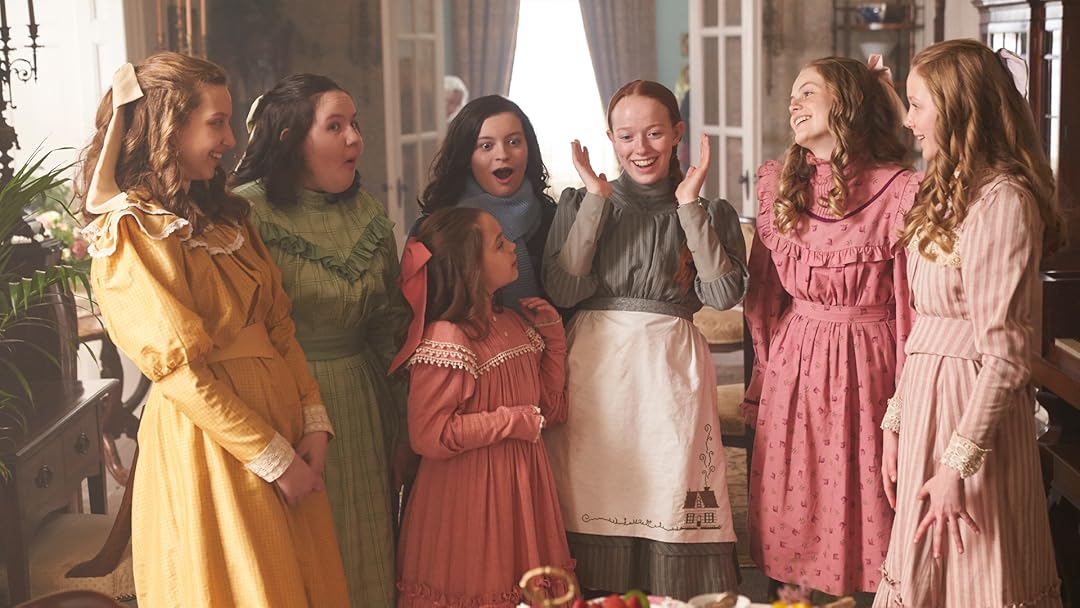

In [22]:
image

In [14]:
from vertexai.generative_models import GenerativeModel, Image

# Cargar el modelo
model = GenerativeModel("gemini-pro-vision")

# Ruta de la imagen local
image_path = "/Users/lauraorozco/Desktop/vertex_ai/src/notebook/test_images.jpg"

# Cargar la imagen usando vertexai.generative_models.Image
image = Image.load_from_file(image_path)

# Generar respuesta
response = model.generate_content([image, "Describe esta imagen"])

# Imprimir la respuesta
print("------- Respuesta --------")
print(response.text)




------- Respuesta --------
 Esta imagen muestra a siete mujeres jóvenes de pie en una habitación, vestidas con ropa de época. Todas las mujeres están sonrientes y parecen estar contentas. En el fondo hay una ventana y una puerta.


-------Prompt--------


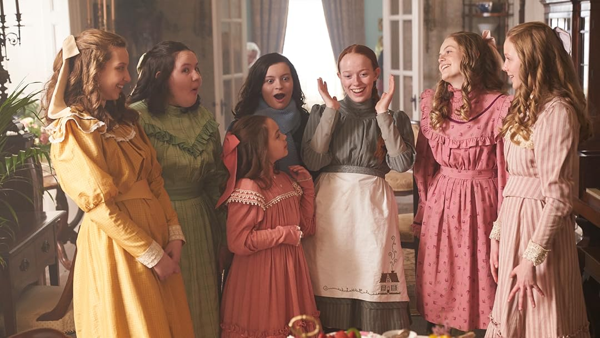

que calificacion imdb tiene cada una de las series que me has sugerido?

-------Response--------
 * Anne with an E: 8.7
* The Crown: 8.7
* The Queen's Gambit: 8.6
* The Witcher: 8.2
* The Umbrella Academy: 8.0
* Stranger Things: 8.7
* The Haunting of Hill House: 8.6
* The Haunting of Bly Manor: 8.4
* Mindhunter: 8.6
* The Crown: 8.7

In [21]:
contents = [image, prompt]

response = model.generate_content(contents)

print("-------Prompt--------")
print_multimodal_prompt(contents)

print("\n-------Response--------")
print(response.text, end="")